## Diagnosis of Breast Cancer
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

#### Table of Content

* Importing the Relevant Libraries
* Importing the Dataset
* Data Inspection
* Exploratory Data Analysis
* Building Model
* Making a Prediction
* Comparison of the Prediction Models
* Predicting the Error


#### Regular EDS and plotting Libraries

In [71]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Importing Dataset

In [4]:
pwd()

'C:\\Users\\Debjit\\Desktop\\Decodr Data Science Course\\Projects\\Project 2 - Breast Cancer'

In [5]:
df1 = pd.read_csv('breast-cancer-wisconsin.csv', header=None)

#### Loading the dataset

In [6]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df2 = pd.read_csv("breast-cancer-wisconsin-names.csv", header=None)

temp = ['Sample code number']
for i in range(1,len(df2[0])):
    temp.append(df2[1][i])
print (temp)

df1.columns = temp
print(df1.head)

['Sample code number', 'Clump Thickness', 'Uniformity of  Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses ', 'Class']
<bound method NDFrame.head of      Sample code number  Clump Thickness  Uniformity of  Cell Size  \
0               1000025                5                         1   
1               1002945                5                         4   
2               1015425                3                         1   
3               1016277                6                         8   
4               1017023                4                         1   
..                  ...              ...                       ...   
694              776715                3                         1   
695              841769                2                         1   
696              888820                5                        10   
697              897471                4      

#### Converting the dataset into a Dataframe

In [8]:
df = pd.DataFrame(df1)
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


#### Detail and description of the DataFrame

In [9]:
df.shape

(699, 11)

In [10]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
# Counting the values
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [12]:
# Normalized value counts
df['Class'].value_counts(normalize=True)

2    0.655222
4    0.344778
Name: Class, dtype: float64

#### Data Cleaning

In [174]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of  Cell Size       0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [175]:
df.replace('?', np.nan, inplace= True)

In [176]:
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of  Cell Size        0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

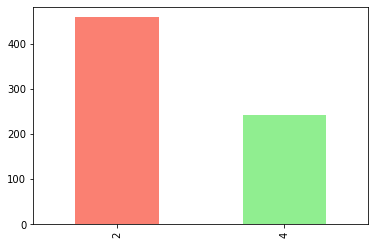

In [177]:
# Plot the value counts with a bar graph
df['Class'].value_counts().plot(kind="bar", color=["salmon", "lightgreen"]);

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of  Cell Size     699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [17]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

<Figure size 576x432 with 0 Axes>

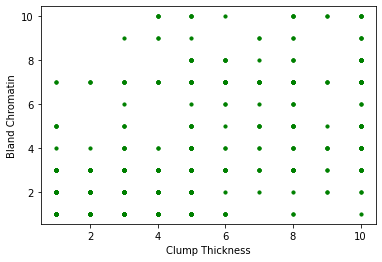

In [68]:
plt.figure(figsize =(8,6))
df.plot.scatter('Clump Thickness','Bland Chromatin',s=10,c='Green');

In [25]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of  Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses ', 'Class'],
      dtype='object')

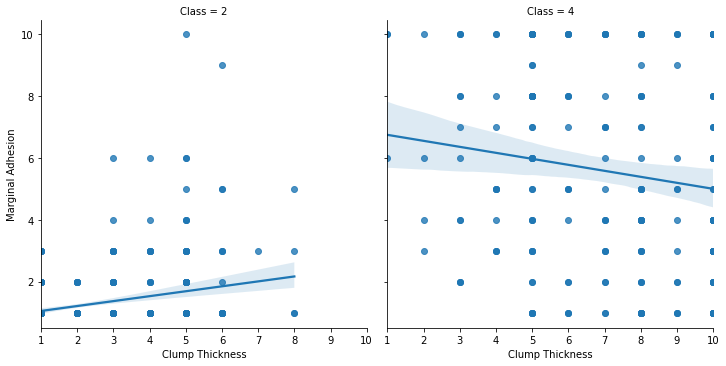

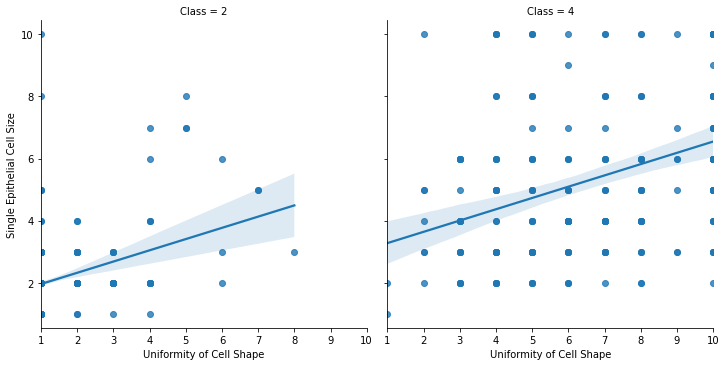

In [74]:
sns.lmplot(x='Clump Thickness',y='Marginal Adhesion',col='Class',data=df)
sns.lmplot(x='Uniformity of Cell Shape',y='Single Epithelial Cell Size',col='Class',data=df)

<Figure size 720x720 with 0 Axes>

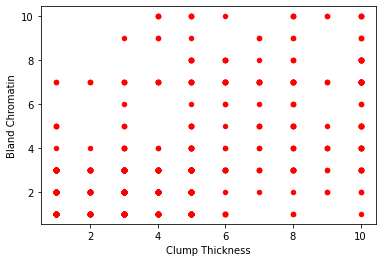

In [92]:
plt.figure(figsize = (10,10))
df.plot(x ='Clump Thickness',
        y='Bland Chromatin',
        kind ='scatter',
        color='red');        

#### Correlation between independent variables

In [185]:
# The correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


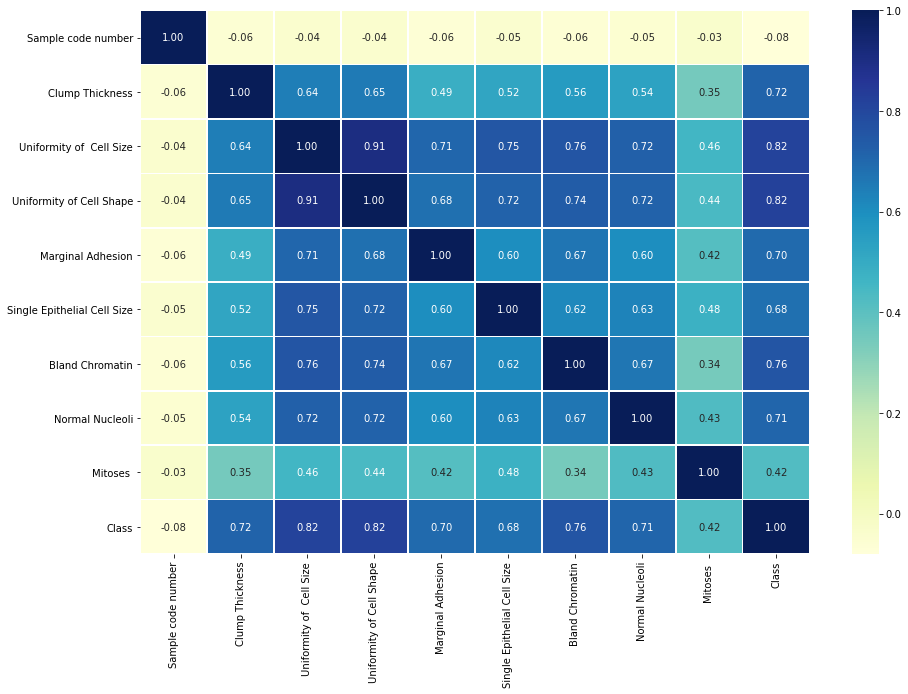

In [255]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

#### We will classify the class of this dataframe.

In [250]:
df.dropna(inplace=True)

In [251]:
df.reset_index(inplace=True)

In [231]:
# Splitting the data except the Class variable

X = df.drop('Class', axis=1)

# Class variable
y = df['Class']

In [232]:
X['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [233]:
X.drop('Sample code number', axis=1, inplace=True)

##### Let's see our new variables.

In [234]:
# Independent variables (with no Class column)
X

,index,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0,5,1,1,1,2,1,3,1,1
1,1,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,3,6,8,8,1,3,4,3,7,1
4,4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
678,694,3,1,1,1,3,2,1,1,1
679,695,2,1,1,1,2,1,1,1,1
680,696,5,10,10,3,7,3,8,10,2
681,697,4,8,6,4,3,4,10,6,1


In [235]:
X.drop('index', axis=1, inplace=True)

In [236]:
# Class variable
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

#### Splitting the data into Train & Test

In [213]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)                                               
                                                 

In [214]:
X_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
437,3,1,1,3,2,1,1,1,1
256,7,9,4,10,10,3,5,3,3
584,5,2,4,1,1,1,1,1,1
18,10,7,7,6,4,10,4,1,2
350,2,1,1,1,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
71,9,4,5,10,6,10,4,8,1
106,1,1,1,1,2,1,2,3,1
270,10,5,7,3,3,7,3,3,8
435,4,1,1,3,1,1,2,1,1


In [215]:
y_train, len(y_train)

(437    2
 256    4
 584    2
 18     4
 350    2
       ..
 71     4
 106    2
 270    4
 435    2
 102    4
 Name: Class, Length: 546, dtype: int64,
 546)

In [216]:
X_test

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
292,8,3,4,9,3,10,3,3,1
145,8,8,7,4,10,10,7,8,7
211,1,1,1,1,2,1,3,1,1
118,1,1,2,2,2,1,3,1,1
302,1,1,1,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...
110,10,3,3,10,2,10,7,3,3
82,3,5,7,8,8,9,7,10,7
51,5,5,5,8,10,8,7,3,7
210,1,1,1,1,2,1,2,1,1


In [217]:
y_test, len(y_test)

(292    4
 145    4
 211    2
 118    2
 302    2
       ..
 110    4
 82     4
 51     4
 210    2
 548    2
 Name: Class, Length: 137, dtype: int64,
 137)

#### Model choices
1. K-Nearest Neighbors - KNeighboursClassifier()
2. RandomForest Classification - RandomForestClassifier()

### 1. K-Nearest Neighbors Classifier

In [218]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [222]:
# Loading K-Nearest Neighbors
KNN_model = KNC(n_neighbors = 3)

# Fitting the model
KNN_model.fit(X_train, y_train)

#predict
KNN_predicted_y_test  = KNN_model.predict(X_test)

#actual
KNN_actual_y_test = y_test

In [241]:
KNN_predicted_y_test

array([4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2], dtype=int64)

In [224]:
KNN_actual_y_test

292    4
145    4
211    2
118    2
302    2
      ..
110    4
82     4
51     4
210    2
548    2
Name: Class, Length: 137, dtype: int64

In [225]:
#KNN_model Score

KNN_model.score(X_train, y_train)

0.9706959706959707

### 2. RandomForest Classification

In [220]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [221]:
#create a model
RF_model = RFC(n_estimators= 250,max_depth= 1)

#model fitting
RF_model.fit(X_train, y_train)

#prediction 
RF_predicted_y_test = RF_model.predict(X_test)

#actual
RF_actual_y_test = y_test

In [226]:
RF_predicted_y_test

array([4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 2, 2], dtype=int64)

In [228]:
RF_actual_y_test

292    4
145    4
211    2
118    2
302    2
      ..
110    4
82     4
51     4
210    2
548    2
Name: Class, Length: 137, dtype: int64

In [229]:
RF_model.score(X_train,y_train)

0.9633699633699634

### Model Comparison

<Figure size 1440x1080 with 0 Axes>

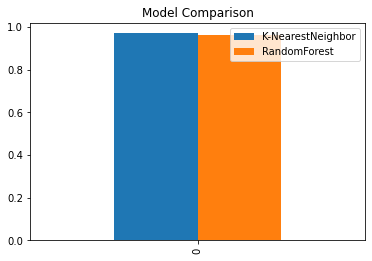

In [230]:
A = KNN_model.score(X_train, y_train)
B = RF_model.score(X_train,y_train)
model_scores =(A,B)
model_compare = pd.DataFrame(model_scores)
plt.figure(figsize=(20, 15))
model_compare.T.plot.bar();
plt.title("Model Comparison")
plt.legend(["K-NearestNeighbor","RandomForest"]);

### RMSE

In [244]:
from sklearn import metrics
MSE= metrics.mean_squared_error(y_test,RF_predicted_y_test)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.5919163484003881
